<a href="https://colab.research.google.com/github/PhDNoe/IA_2023/blob/main/indian_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


---
## Indian diabetes dataset

---

In [ ]:
# Diabetes dataset
df = pd.read_csv("diabetes.csv")
nrows, ncols = df.shape
print(f"nrows = {nrows}   ncols = {ncols}")

nrows = 768   ncols = 9


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
## Columns dtypes??

---

In [ ]:
# We can see data type of each columns

print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


---
## Statistics??

---

In [ ]:
# Statistics
description = df.describe()
description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
## Missing values??

---

In [ ]:
#There are Nan values in some column?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---
## imbalanced class??

---

In [ ]:
# Are the classes imbalanced?
# The classes are the outcome column
class_counts = df.groupby("Outcome").size()

class_counts
# there are nearly double the number of observations with class 0

Outcome
0    500
1    268
dtype: int64

---
## Setting pandas options

---

In [ ]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
## Showing up correlation between columns

---

In [ ]:
df.corr(method='pearson')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


---
## Skew of univariate Distribution

---

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.<br>
Many machine learning algorithms assume a Gaussian distribution. <br>
Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. <br>
You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame. <br>

**The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.**

---

In [ ]:
skew = df.skew()

print(skew)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


---

# Univariates plots

---

* Histograms
* Density plots
* Box and whiskers plot

---

## Histogram

---

C:\Users\Usuario\AppData\Local\Temp/ipykernel_456/3813475328.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

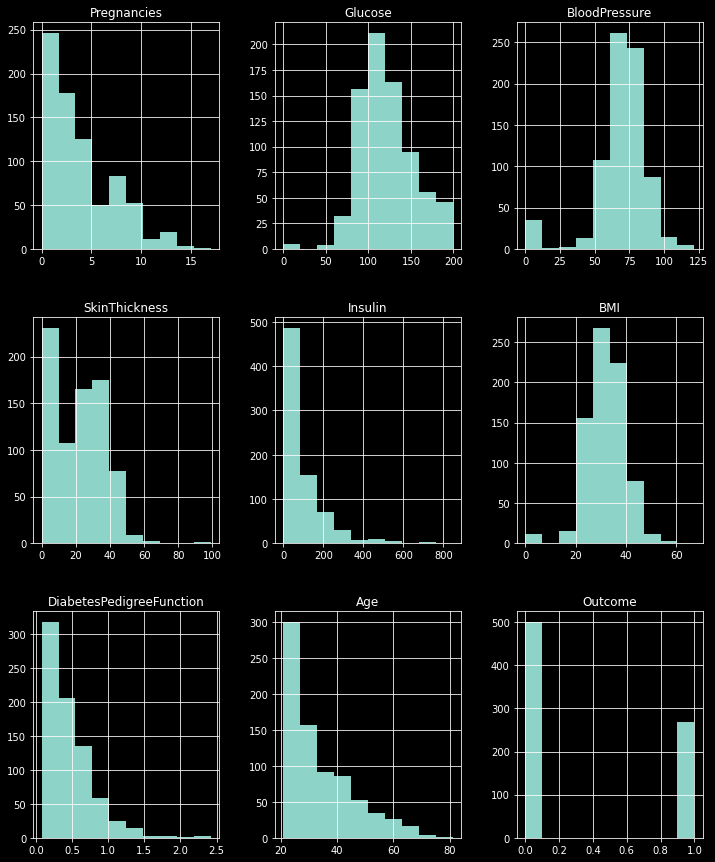

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("diabetes.csv")


fig = plt.figure(figsize = (12,15))
ax = fig.gca()
df.hist(ax = ax)

---
## Density plots

---

C:\Users\Usuario\Anaconda\envs\bandasPintura\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

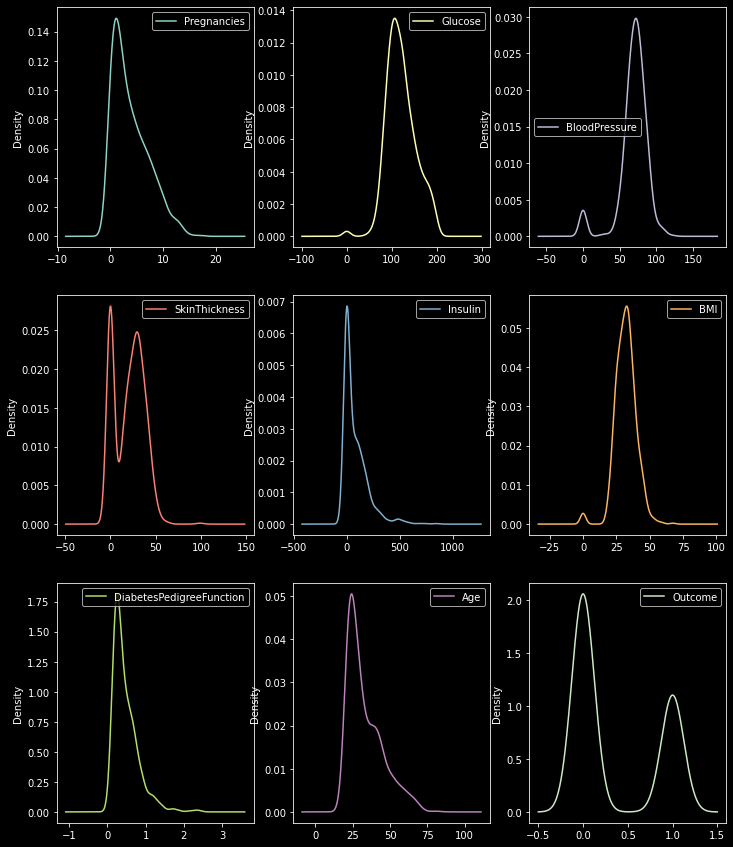

In [ ]:
fig = plt.figure(figsize=(12, 15))
ax = fig.gca()
df.plot(ax = ax, kind="density", subplots=True, layout = (3, 3), sharex = False)

---
## Box and whiskers plots

---

C:\Users\Usuario\Anaconda\envs\bandasPintura\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

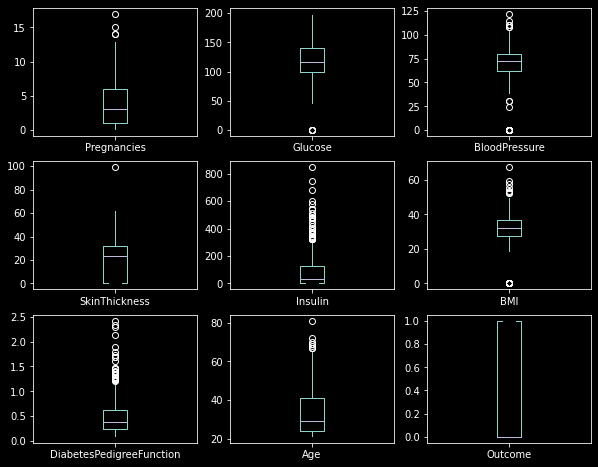

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
df.plot(ax=ax, kind="box", subplots=True, layout = (3, 3), sharex=False, sharey = False)

---
# Multivariates plots

---

* Correlation Matrix Plot
* Scatter plot

---

## Correlation Matrix Plot

---

[Text(0, 0, 'Pregnancies'),
 Text(0, 1, 'Glucose'),
 Text(0, 2, 'BloodPressure'),
 Text(0, 3, 'SkinThickness'),
 Text(0, 4, 'Insulin'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'DiabetesPedigreeFunction'),
 Text(0, 7, 'Age'),
 Text(0, 8, 'Outcome')]

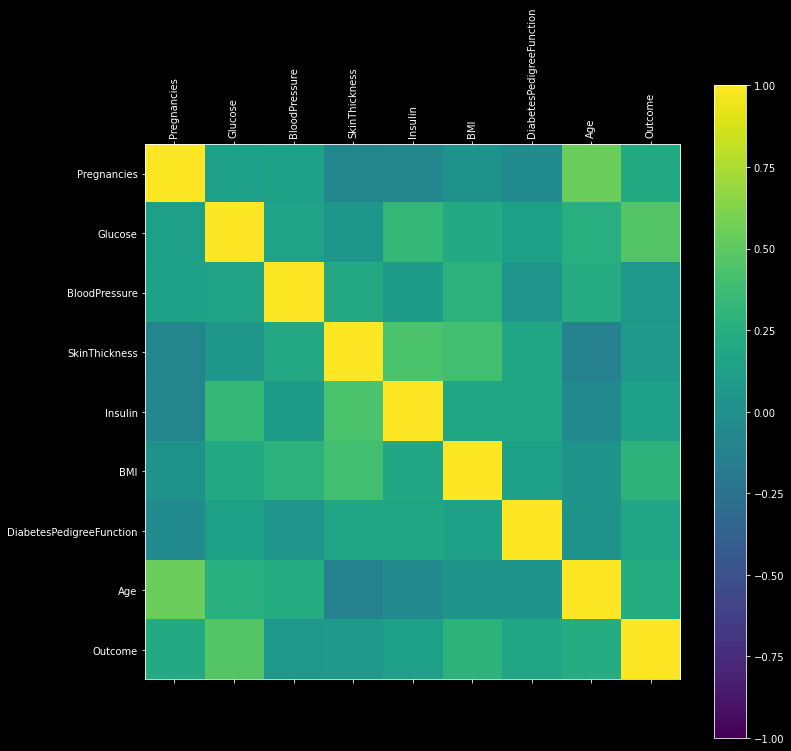

In [ ]:
correlation = df.corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)

---
## Scatter plot

---

C:\Users\Usuario\AppData\Local\Temp/ipykernel_456/1184088506.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, ax=ax)


array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

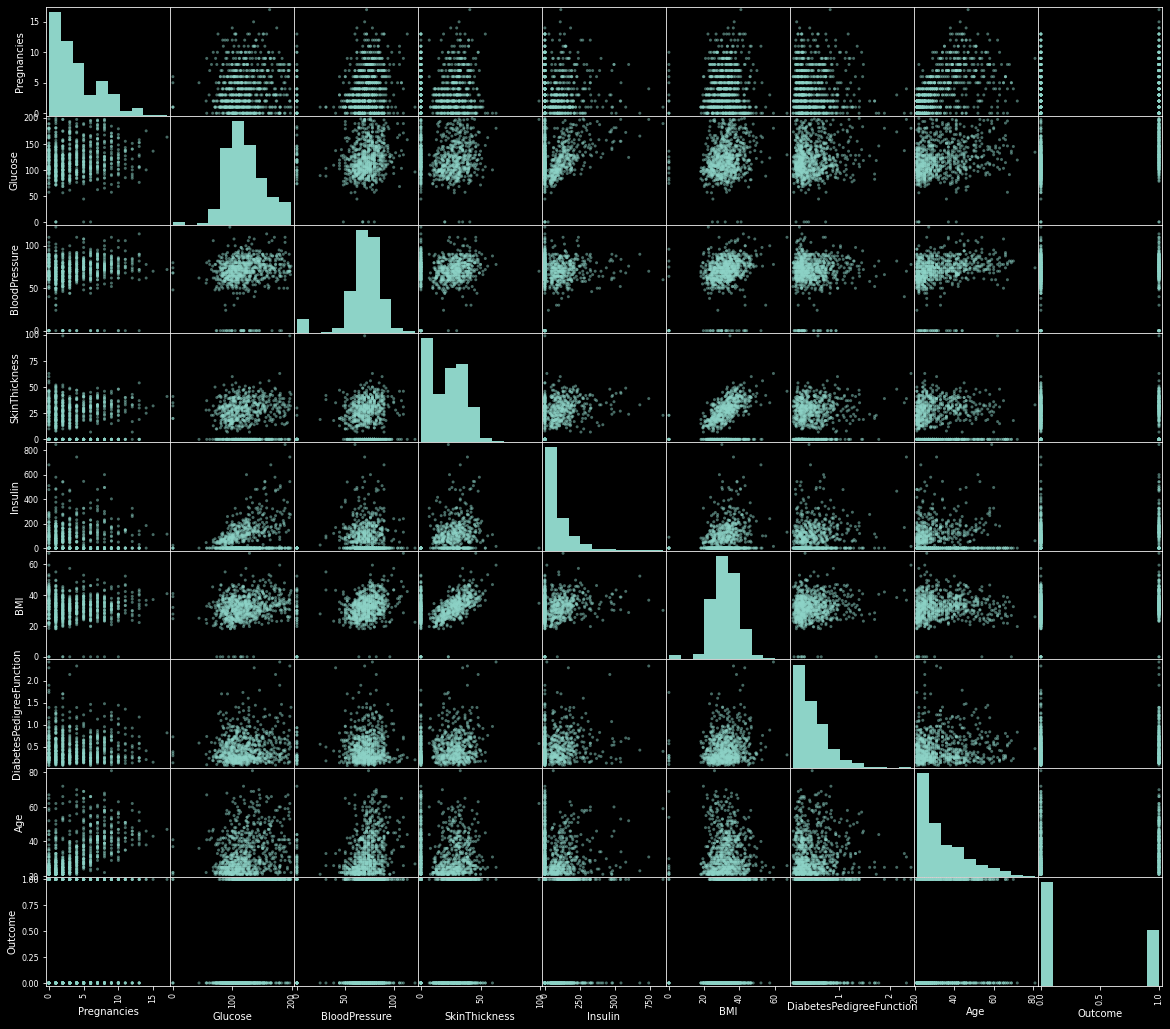

In [ ]:
fig = plt.figure(figsize=(20,18))
ax = fig.gca()
pd.plotting.scatter_matrix(df, ax=ax)


---
# Data preparation

---
## Transform data

---

The scikit-learn library provides two standard idioms for transforming data.<br>
* Fit and Multiple Transform. *(preferred approach)*
* Combined Fit-And-Transform.


You call the fit() function to prepare the parameters of the transform once on your data. <br>
Then later you can use the transform() function on the same data to prepare it for modeling and again on the test or validation dataset or new data that you may see in the future.


---

## Rescale Data

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("diabetes.csv")

# Transformo el dataframe a numpy array
array = df.values

X = array[:, 0:8]
Y = array[:, 8]

# Normalizacion
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


---
## Standardize Data

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("diabetes.csv")

# Transformo el dataframe a numpy array
array = df.values

X = array[:, 0:8]
Y = array[:, 8]

# Normalizacion
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


---
## Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra). 

This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance
measures such as k-Nearest Neighbors. 

You can normalize data in Python with scikit-learn using the Normalizer class.

---

## Warning!!

MinMaxScaler is applied column-wise, Normalizer is applied row-wise.

Do not confuse Normalizer with MinMaxScaler. The Normalizer class from Sklearn normalizes samples individually to unit norm. It is not column based but a row-based normalization technique.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
df = pd.read_csv("diabetes.csv")

# Transformo el dataframe a numpy array
array = df.values

X = array[:, 0:8]
Y = array[:, 8]

# Normalizacion
scaler = Normalizer().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


---
## Binarize data

---

We can transform our data using a binary threshold.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
df = pd.read_csv("diabetes.csv")

# Transformo el dataframe a numpy array
array = df.values

X = array[:, 0:8]
Y = array[:, 8]

# Normalizacion
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


---
# Feature selection

---

Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. <br>
Having irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three bene
ts of performing feature selection before modeling your data are:

* **Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy:** Less misleading data means modeling accuracy improves.
* **Reduces Training Time:** Less data means that algorithm train faster

---

## Univariate Selection

---

Statistical tests can be used to select those features that have the strongest relationship with
the output variable. 

The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of di
erent statistical tests to select a speci
c number of features. 

The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best
features from the Indians Diabetes onset of diabetes dataset.

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

df = pd.read_csv("diabetes.csv")

# Transformo el dataframe a numpy array
array = df.values

X = array[:, 0:8]
Y = array[:, 8]

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

# Summarize selected features
print(features[0:5, ])

filter = test.get_support()
cols= list(df.columns)
cols.pop()

cols = np.array(cols)
print("------------------------------------")
print("All features:")
print(cols)
 
print("------------------------------------")
print("Selected best 4:")
print(cols[filter])
print("------------------------------------")


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]
------------------------------------
All features:
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
------------------------------------
Selected best 4:
['Glucose' 'Insulin' 'BMI' 'Age']
------------------------------------


---
## Another example of selectKBest with iris dataset

---

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from sklearn.datasets import load_iris
from numpy import array 

iris = load_iris()
x = iris.data
y = iris.target
 
print("Feature data dimension: ", x.shape) 
 
select = SelectKBest(score_func=chi2, k=3)
z = select.fit_transform(x,y)
 
print("After selecting best 3 features:", z.shape) 

filter = select.get_support()
features = array(iris.feature_names)

 
print("All features:")
print(features)
 
print("Selected best 3:")
print(features[filter])
print(z) 


Feature data dimension:  (150, 4)
After selecting best 3 features: (150, 3)
<class 'list'>
<class 'numpy.ndarray'>
All features:
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Selected best 3:
['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1

---
## Recursive Feature Elimination

---

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. 

It uses the model accuracy to identify which
attributes (and combination of attributes) contribute the most to predicting the target attribute.

---

In [ ]:
# Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

# load data

dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select = 3)
fit = rfe.fit(X, Y)

print(f"Num Features: {fit.n_features_}") 
print(f"Selected Features:{fit.support_}") 
print(f"Feature Ranking: {fit.ranking_}") 

Num Features: 3
Selected Features:[ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Users\Usuario\Anaconda\envs\bandasPintura\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## Principal Component Analysis

---

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. 

Generally this is called a data reduction technique. 

A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result.

---

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv("diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print(f"Explained Variance: {fit.explained_variance_ratio_}\n\n") 
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]


[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


---
# Evaluate the performance of Machine Learning algorithm

---

## Train - Test Split

Principal inconveniente con este enfoque:
**Alta varianza**  --> Esto significa *overfitting*.

---

In [ ]:
# Evaluate using a train and a test set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



df = pd.read_csv("diabetes.csv")
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 8

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# We can train a Logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

result_train = model.score(X_train, Y_train)
result_test = model.score(X_test, Y_test)
print(f"Accuracy test: {result_test*100.0:.3f}") 
print(f"Accuracy train: {result_train*100.0:.3f}") 

Accuracy test: 79.134
Accuracy train: 77.821


---
## K-fold cross validation

---

In [ ]:
# Evaluate using Cross Validation
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# kfold = KFold(n_splits=num_folds)


model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy: {results.mean()*100.0:.3f}% ({results.std()*100.0:.3f}%)") 

Accuracy: 77.216% (4.968%)


---
## Leave one out


---

In [ ]:
# Evaluate using Leave One Out Cross Validation
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]



loocv = LeaveOneOut()

model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=loocv)

print(f"Accuracy: {results.mean()*100:.3f}% ({results.std()*100.0:.3f}%)") 

Accuracy: 77.604% (41.689)


---
## Repeated Random Test-Train Splits

---

In [ ]:
# Evaluate using Shuffle Split Cross Validation
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy: {results.mean()*100.0}% ({results.std()*100.0}%)") 

Accuracy: 76.53543307086613% (2.235444026232818%)


---
# Machine Learning Algorithm Performance Metrics

---
## Classification Accuracy

---

In [ ]:
# Cross Validation Classification Accuracy
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



df = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'


results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f"Accuracy: {results.mean():.3f}    ({results.std():.3f})")

Accuracy: 0.772    (0.050)


---
## Logarithmic Loss

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the
measure is inverted to be ascending when using the cross val score() function.

---

In [ ]:
# Cross Validation Classification LogLoss
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



df = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=500)

scoring = 'neg_log_loss'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f"Logloss: {results.mean():.3f} ({results.std():.3f})")

Logloss: -0.485 (0.057)


---
## Area under ROC curves

---

* **Sensitivity:** Nº True Positives / (Nº True Positives + Nº False Negatives) (**Also call "The *recall*"**)
* **Specificity:** Nº True Negatives / (Nº True Negatives + Nº False Positives)

---

In [ ]:
# Cross Validation Classification ROC AUC
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=500)
scoring = 'roc_auc'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f"AUC: {results.mean():.3f} ({results.std():.3f})") 

# The AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the prediction

AUC: 0.829 (0.047)


---
## Confusion Matrix

---

In [ ]:
# Cross Validation Classification Confusion Matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


df = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[142  20]
 [ 34  58]]


---
## Classification Report

---

In [ ]:
# Cross Validation Classification Report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


df = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)

model.fit(X_train, Y_train)
predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)
print(report)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254

[[142  20]
 [ 34  58]]


---
# Regression Metrics

---
## Mean Absolute Error (MAE)

---

In [ ]:
# Cross Validation Regression MAE
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
Y = boston.target
names = boston.feature_names
print(names)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()

scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(f"MAE: {results.mean():.3f} ({results.std():.3f})")  

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
MAE: -3.387 (0.667)


---
## Mean squared error (MSE)

---

In [ ]:
# Cross Validation Regression MSE
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
Y = boston.target
names = boston.feature_names
print(names)

num_folds = 10
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LinearRegression()
scoring = 'neg_mean_squared_error'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f"MSE: {results.mean():.3f} ({results.std():.3f})") 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
MSE: -23.747 (11.143)


---
# Machine Learning Algorithms

---

## Logistic Regression

---

In [ ]:
# Logistic Regression Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7721633629528366


---
## Linear Discriminant Analysis

---

In [ ]:
# LDA Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


---
# Non linear Machine Learning

---

## K- Nearest Neighbors

---

In [ ]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


dataframe = pd.read_csv("diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7109876965140123


---
## Naive Bayes

---

In [ ]:
# Gaussian Naive Bayes Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

dataframe = pd.read_csv("diabetes.csv")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7591421736158578
